In [1]:
import pybaseball as pb 
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
# import cubs 2016 record
cubs = pb.schedule_and_record(2016, 'CHC')

http://www.baseball-reference.com/teams/CHC/2016-schedule-scores.shtml


c:\Users\patri\Desktop\code\Baseball-Stats\.venv\lib\site-packages\pybaseball\team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


In [5]:
cubs.head()

,Date,Tm,Home_Away,Opp,W/L,R,RA,Inn,W-L,Rank,GB,Win,Loss,Save,Time,D/N,Attendance,cLI,Streak,Orig. Scheduled
1,"Monday, Apr 4",CHC,@,LAA,W,9.0,0.0,9.0,1-0,1.0,Tied,Arrieta,Richards,None,3:08,N,44020.0,.93,1,None
2,"Tuesday, Apr 5",CHC,@,LAA,W,6.0,1.0,9.0,2-0,1.0,Tied,Lester,Heaney,None,2:34,N,37042.0,.98,2,None
3,"Thursday, Apr 7",CHC,@,ARI,W,14.0,6.0,9.0,3-0,1.0,Tied,Lackey,De La Rosa,None,3:29,N,24656.0,1.05,3,None
4,"Friday, Apr 8",CHC,@,ARI,L-wo,2.0,3.0,9.0,3-1,2.0,1.0,Ziegler,Cahill,None,2:48,N,27539.0,1.07,-1,None
5,"Saturday, Apr 9",CHC,@,ARI,W,4.0,2.0,9.0,4-1,1.0,Tied,Hendricks,Greinke,Rondón,2:46,N,32185.0,1.02,1,None


In [ ]:
# calculate games above by subtracting loses from wins in the record column
cubs['Games Above .500'] = cubs['W-L'].apply(lambda x: int(x.split('-')[0]) - int(x.split('-')[1]))
cubs.head()

,Date,Tm,Home_Away,Opp,W/L,R,RA,Inn,W-L,Rank,...,Win,Loss,Save,Time,D/N,Attendance,cLI,Streak,Orig. Scheduled,Games Above .500
1,"Monday, Apr 4",CHC,@,LAA,W,9.0,0.0,9.0,1-0,1.0,...,Arrieta,Richards,None,3:08,N,44020.0,.93,1,None,1
2,"Tuesday, Apr 5",CHC,@,LAA,W,6.0,1.0,9.0,2-0,1.0,...,Lester,Heaney,None,2:34,N,37042.0,.98,2,None,2
3,"Thursday, Apr 7",CHC,@,ARI,W,14.0,6.0,9.0,3-0,1.0,...,Lackey,De La Rosa,None,3:29,N,24656.0,1.05,3,None,3
4,"Friday, Apr 8",CHC,@,ARI,L-wo,2.0,3.0,9.0,3-1,2.0,...,Ziegler,Cahill,None,2:48,N,27539.0,1.07,-1,None,2
5,"Saturday, Apr 9",CHC,@,ARI,W,4.0,2.0,9.0,4-1,1.0,...,Hendricks,Greinke,Rondón,2:46,N,32185.0,1.02,1,None,3


In [20]:
# investigate some descriptive statistics
cubs.describe()

cubs['Date']

1          Monday, Apr 4
2         Tuesday, Apr 5
3        Thursday, Apr 7
4          Friday, Apr 8
5        Saturday, Apr 9
             ...        
158    Wednesday, Sep 28
159     Thursday, Sep 29
160       Friday, Sep 30
161      Saturday, Oct 1
162        Sunday, Oct 2
Name: Date, Length: 162, dtype: object

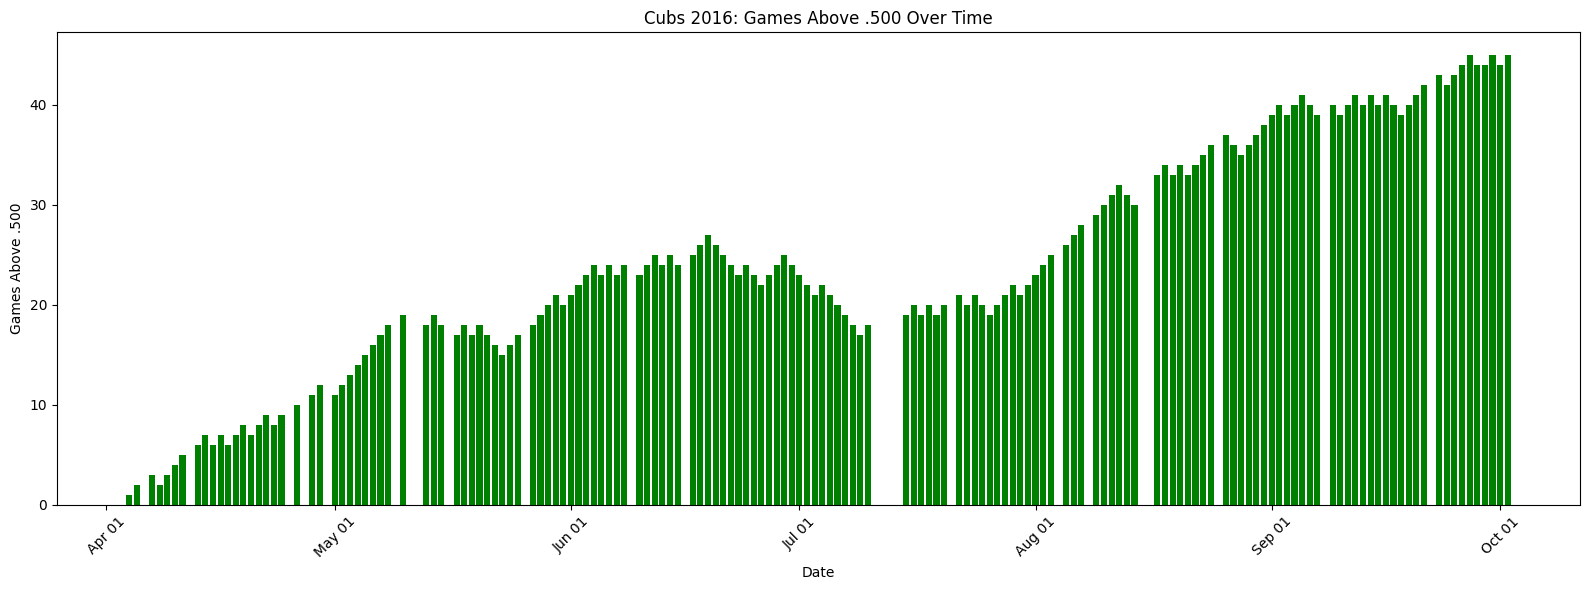

In [26]:
# bar chart of Games Above .500 with color based on value
import matplotlib.dates as mdates

dates = pd.to_datetime(cubs['Date'], format = '%A, %b %d', errors='coerce')
games_above = cubs['Games Above .500']

colors = ['green' if val >= 0 else 'red' for val in games_above]

plt.figure(figsize=(16,6))
plt.bar(dates, games_above, color=colors)
plt.xlabel('Date')
plt.ylabel('Games Above .500')
plt.title('Cubs 2016: Games Above .500 Over Time')
plt.xticks(rotation=45)

ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

plt.tight_layout()
plt.show()